## 그룹화(Cluster)
- 비지도 학습 : label 이 없는 datasets

## 데이터 수집

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
# iris_dataset

## 데이터 분석

## 데이터 전처리

In [3]:
features = iris_dataset['data']
features[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [4]:
iris_dataset['target'], iris_dataset['feature_names']

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

### 결측치 처리

### 스케일링
- 지수화와 비슷

## 데이터 분할

## 모델 학습

### 알맞은 그룹 갯수 찾기

In [ ]:
from sklearn.cluster import KMeans


In [14]:
cluster_loop_list = [2,3,4,5,6,7,8,9,10]

result_list = list()
for number_cluster in cluster_loop_list : 
    model_number = KMeans(n_clusters=number_cluster)
    model_number.fit(features)
    result_list.append(model_number.inertia_)
    pass

result_list

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

[152.3479517603579,
 78.85144142614601,
 57.228473214285714,
 46.464653846153844,
 39.03998724608725,
 34.40900974025975,
 29.98894395078606,
 28.284712305238628,
 26.019241540115107]

### Elbow 확인

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

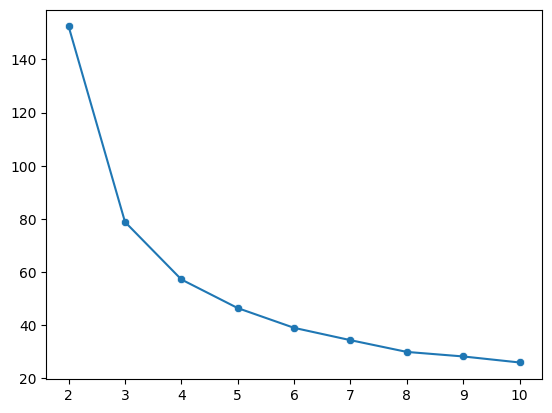

In [16]:
sns.scatterplot(x = cluster_loop_list, y = result_list)
sns.lineplot(x = cluster_loop_list, y = result_list)
plt.show()

# 적당한 n클러스터는 3이다.

### 찾은 갯수로 학습

In [8]:

# 중앙 갯수(카테고리 갯수) 지정
# model_KMeans = KMeans(n_clusters = 3)
model_KMeans = KMeans(n_clusters = 4) # 카테고리 갯수를 임의 지정
model_KMeans.fit(X = features)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

## 모델 평가

In [10]:
import numpy as np
# features row별 model이 predict한 label 값들
# model_KMeans.labels_, 
np.unique(model_KMeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [11]:
# 각 카테고리별 중앙 벡터 확인
model_KMeans.cluster_centers_

array([[6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

## 모델 배포